In [88]:
import numpy as np
import csv
import matplotlib.pyplot as plt

with open('iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

splitting the data

In [115]:
import random
import csv
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        random.seed(0)
        random.shuffle(dataset)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
        indx= int(len(dataset)*split)
        trainingSet= dataset[:indx]
        testSet=dataset[indx:]

        return trainingSet , testSet

trainingSet=[]
testSet = []

loadDataset('iris.data.txt', 0.66,trainingSet , testSet)

print(len(trainingSet),len(testSet))

0 0


Distance function :


In [114]:
import math
def euclideanDistance(instance1, instance2, length):
    difference_squared = 0
    for x in range(length):
        difference_squared += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(difference_squared)


Neighbors :

In [101]:
import operator

def getNeighbors(trainingSet, testInstance, k,distance_metric=None):
   
    distances = []
    length = len(testInstance)-1
    #print(length)
    for x in range(len(trainingSet)):
        dist = distance_metric(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
      
    distances.sort(key=operator.itemgetter(1))
        #print('distances sorted',distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
        #print('The new one look like neighbors', neighbors)
    return neighbors

In [107]:
def getResponse(neighbors):
    classVotes = {}

    for x in range(len(neighbors)):
        response = neighbors[x][-1] #complete with appropriate number
        
        classVotes.setdefault(response,0)
        if response in classVotes.keys():
            # increase frequency by +1
            classVotes[response] +=1

    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

# We can test out this function with some test neighbors, as follows:

neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)
print(response)

a


In [108]:
def getAccuracy(testSet, predictions):
    # Complete the function
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct +=1
   
    return (correct/len(testSet)) * 100.0

# We can test this function with a test dataset and predictions, as follows:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


In [109]:
def main(dataset_filename, k, split, distanceFunc):
    
    trainingSet, testSet=loadDataset(dataset_filename, split)
    
    predictions = []
    for testInstance in testSet:
        neighbors = getNeighbors(trainingSet, testInstance[:-1], k, distanceFunc)
        response = getResponse(neighbors)
        predictions.append(response)
        
    accuracy = getAccuracy(testSet, predictions)
    print("Accuracy = %.2f" % accuracy)
    return accuracy

In [129]:
scores=[]
for k in range(1,31):
    accuracy=main("iris.data.txt", k, 0.66, euclideanDistance)
    scores.append(accuracy)

Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 98.04
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 94.12


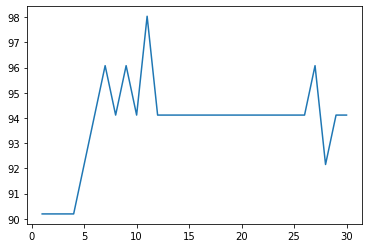

In [130]:
plt.plot(range(1,31),scores)

In [131]:
import numpy as np
print("the best Accuracy is",np.max(scores))
print("best k is :", np.argmax(scores)+1)

the best Accuracy is 98.0392156862745
best k is : 11


In [132]:
def manhattanDistance(instance1, instance2, length):
    #   Complete the function
    distance = 0
    for i in range(length):
        distance += abs(instance2[i]-instance1[i])

    return distance

def minkowskiDistance(instance1, instance2, length,degree=2):
    difference_squared = 0
    for x in range(length):
        difference_squared += pow((instance1[x] - instance2[x]), degree)
    return pow(difference_squared,1/degree)

Manhattan distance :

In [133]:
scores=[]
for k in range(1,31):
    accuracy=main("iris.data.txt", k, 0.66, manhattanDistance)
    scores.append(accuracy)

Accuracy = 92.16
Accuracy = 92.16
Accuracy = 92.16
Accuracy = 92.16
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 92.16
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 96.08


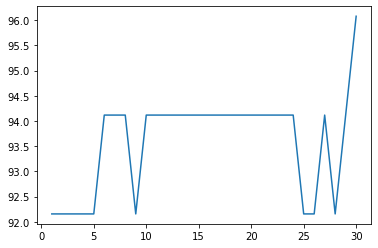

In [134]:
plt.plot(range(1,31),scores)

In [135]:
import numpy as np
print("the best Accuracy is",np.max(scores))
print("best k is :", np.argmax(scores)+1)

the best Accuracy is 96.07843137254902
best k is : 30


Minkowski distance :

In [136]:
scores=[]
for k in range(1,31):
    accuracy=main("iris.data.txt", k, 0.66, minkowskiDistance)
    scores.append(accuracy)

Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 90.20
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 94.12
Accuracy = 98.04
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 94.12
Accuracy = 96.08
Accuracy = 92.16
Accuracy = 94.12
Accuracy = 94.12


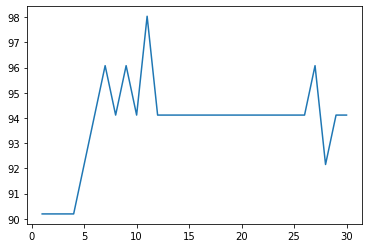

In [137]:
plt.plot(range(1,31),scores)

In [138]:
import numpy as np
print("the best Accuracy is",np.max(scores))
print("best k is :", np.argmax(scores)+1)

the best Accuracy is 98.0392156862745
best k is : 11


euclidean and minkowski ditances gived the best accuracys (98,03) with the same vlaue of k 11